In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#from mpl_toolkits.mplot3d import Axes3D

# Regression Analysis with 3D Visualization and Residuals

## Problem Description
This problem explores the fundamental concept of multiple linear regression by generating synthetic data and calculating the best-fit regression plane using the **Normal Equation**. The goal is to understand how the model fits the data and evaluate its performance by analyzing the **residuals**.

1. **Data Generation**: Create synthetic data to simulate a real-world scenario where two independent variables predict a dependent variable.
2. **Model Fitting**: Use the **Normal Equation** to calculate the regression coefficients and understand their significance.
3. **Residual Analysis**: Assess the performance of the regression model by visualizing the distribution of residuals (errors).
4. **3D Visualization**: Enhance understanding by plotting the regression plane alongside the data points and their residuals in a 3D plot.

This problem is intended to demonstrate key concepts in regression analysis, including:
- The geometric interpretation of regression (plane fitting data points).
- Residual analysis as a diagnostic tool for model performance.
- Visualization techniques for multidimensional data.



Intercept: 4.2371
Coefficients: 3.8232, 0.3520


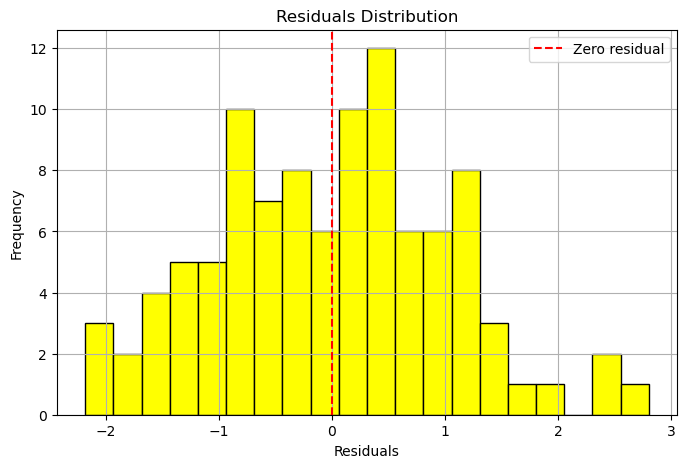

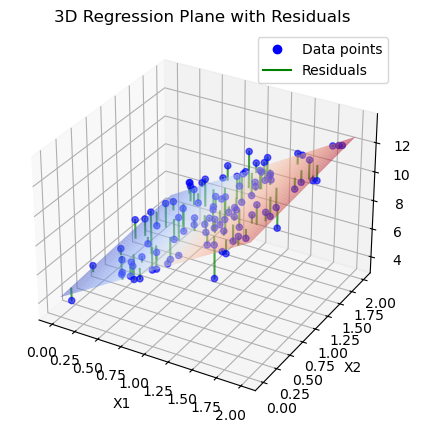

In [2]:

# Generate random data
np.random.seed(35)
X = 2 * np.random.rand(100, 2)  # Randomly generate two independent variables
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate dependent variable with added noise

# Add intercept column to the data
X_intercpt = np.c_[np.ones((100, 1)), X]  # Add a column of ones for the intercept term

# Compute coefficients using the Normal Equation
theta = np.linalg.inv(X_intercpt.T @ X_intercpt) @ X_intercpt.T @ y
print(f"Intercept: {theta[0]:.4f}")
print(f"Coefficients: {theta[1]:.4f}, {theta[2]:.4f}")

# Prepare the regression plane for visualization
boundary_x0 = np.linspace(0, 2, 50)  # Range for the first independent variable
boundary_x1 = np.linspace(0, 2, 50)  # Range for the second independent variable
x0_grid, x1_grid = np.meshgrid(boundary_x0, boundary_x1)  # Create a grid for plotting the regression plane
pre_y = theta[0] + theta[1] * x0_grid + theta[2] * x1_grid  # Compute the predicted y values on the plane

# 1. Compute residuals
y_pt = X_intercpt @ theta  # Predicted values
residual = y - y_pt  # Residuals: difference between actual and predicted values

# Visualize the residual distribution
plt.figure(figsize=(8, 5))
plt.hist(residual, bins=20, color='yellow', edgecolor='black')  # Histogram of residuals
plt.axvline(0, color='red', linestyle='--', label="Zero residual")  # Add a vertical line at zero
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

# 2. Visualize the regression plane and residuals in 3D
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data points', alpha=0.6)

# Plot the regression plane
ax.plot_surface(x0_grid, x1_grid, pre_y, cmap=cm.coolwarm, alpha=0.5)

# Add residual arrows to visualize the difference between actual and predicted values
for i in range(len(X)):
    ax.plot([X[i, 0], X[i, 0]], [X[i, 1], X[i, 1]], [y[i], y_pt[i]], color='green', alpha=0.7)

# Add legend and labels
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title("3D Regression Plane with Residuals")
scatter_proxy = plt.Line2D([0], [0], linestyle="none", marker="o", color="blue", label="Data points")
residual_proxy = plt.Line2D([0], [0], linestyle="-", color="green", label="Residuals")
ax.legend(handles=[scatter_proxy, residual_proxy], loc='upper right')

plt.show()


# Results

## 1. Residuals Distribution
- **Key Insight**: The residuals represent the difference between the observed \( y \) values and the predicted values \( $\hat{y}$ \) based on the regression model.
- **Histogram**:
  - The residuals are distributed roughly around 0, indicating that the regression model generally predicts the data well.
  - The presence of a red dashed line at \( \{Residual} = 0 \) provides a visual reference for perfect prediction.
  - While the distribution appears reasonably centered around 0, the spread of residuals indicates variability in prediction accuracy.

## 2. Regression Plane and Residuals Visualization
- **Regression Plane**:
  - The regression plane visually represents the predicted \( \mathbf{y} \) values based on the fitted model coefficients.
  - It is plotted using a grid of values for the independent variables \( X_1 \) and \( X_2 \).
- **Data Points**:
  - The observed data points (blue) are scattered in the 3D space around the regression plane, indicating the actual values of \( y \) corresponding to \( X_1 \) and \( X_2 \).
- **Residuals**:
  - Green lines connecting the observed data points to the regression plane represent the residuals, emphasizing the vertical distance (error) between observed and predicted values.
  - Longer green lines indicate larger errors, highlighting potential outliers or areas where the model fits less well.

## Interpretation
- The model performs reasonably well, as evident from the clustering of residuals around 0 and the proximity of data points to the regression plane.
- However, the variability in residuals suggests that there might be some data points or patterns that the model fails to fully capture.
- Potential improvements could include:
  - Exploring interaction effects or non-linear relationships.
  - Identifying outliers or leveraging more robust regression techniques.

